#Convolutional Neural Network

As redes neurais convolucionais se distinguem de outras redes neurais por terem desempenho superior com dados de imagem e áudio. Eles têm 3 camadas, à medida que as formas são revestidas pelos dados da imagem progridem da CNN, ela começa a reconhecer elementos ou maiores até mesmo identificar o objeto identificado ou objeto. A cada camada, a CNN aumenta em sua complexidade, identificando maiores porções da imagem.

* convolutional layer

* pool layer

* Fully connected (FC) layer

#### convolutional layer
A camada convolucional é a parte central de uma CNN, é onde ocorre a maior parte da computação. Ela precisa de alguns componentes, que são dados de entrada, um filtro e um mapa de recursos. 

Considerando uma imagem colorida, composta por uma matriz de pixels em 3D. A entrada terá três dimensões — altura, largura e profundidade — que correspondem ao RGB em uma imagem. Também temos um detector de feição, também conhecido como kernel ou filtro, que irá percorrer os campos receptivos da imagem, verificando se a feição está presente. Esse processo é conhecido como convolução.

Embora possa variar em tamanho, o tamanho do filtro é normalmente uma matriz 3x3; isso também determina o tamanho do campo receptivo. O filtro é  aplicado a uma área da imagem em que um produto escalar é calculado entre os pixels de entrada e o filtro. Este produto escalar é então alimentado em uma matriz de saída. Depois, o filtro muda um passo, repetindo o processo até que o kernel tenha varrido toda a imagem. A saída final da série de produtos escalares da entrada e do filtro é conhecida como mapa de recursos, mapa de ativação ou recurso convoluído.

Na imagem abaixo vemos que , cada valor de saída no mapa de recursos não precisa se conectar a cada valor de pixel na imagem de entrada. Ele só precisa se conectar ao campo receptivo, onde o filtro está sendo aplicado.

![image](https://user-images.githubusercontent.com/14276167/179381754-89dfc357-6549-4854-9559-efc1f8070ef1.png)

Os pesos no detector de recursos permanecem fixos à medida que ele se move pela imagem, isso é conhecido como compartilhamento de parâmetros. Alguns parâmetros, como os valores de peso, se ajustam durante o treinamento através do processo de retropropagação e gradiente descendente. No entanto, existem três hiperparâmetros que afetam o tamanho do volume da saída que precisam ser definidos antes do início do treinamento da rede neural. 

Esses incluem:

1. O número de filtros -> afeta a profundidade da saída. Por exemplo, três filtros distintos produziriam três mapas de recursos diferentes, criando uma profundidade de três.

2. Stride -> é a distância, ou número de pixels, que o kernel se move sobre a matriz de entrada. Embora valores de passada de dois ou mais sejam raros, uma passada maior produz uma saída menor.

3. Zero padding ->  geralmente é usado quando os filtros não se ajustam à imagem de entrada. Isso define todos os elementos que estão fora da matriz de entrada para zero, produzindo uma saída maior ou de tamanho igual. 

Após cada operação de convolução, uma CNN aplica uma transformação de Unidade Linear Retificada (ReLU) ao mapa de características, para introduzir a não linearidade no modelo.

#### Pooling Layer
Conduz a redução de dimensionalidade, reduzindo o número de parâmetros na entrada. Varre um filtro em toda a entrada, esse filtro não possui pesose sim um kernel que aplica uma função de agregação aos valores dentro do campo receptivo e preenche a matriz de saída.

#### Fully-Connected Layer
Essa camada realiza a tarefa de classificação com base nas características extraídas das camadas anteriores e seus diferentes filtros. Enquanto as camadas convolucionais e de pooling tendem a usar funções ReLu, as camadas FC geralmente aproveitam uma função de ativação softmax para classificar as entradas adequadamente, produzindo uma probabilidade de 0 a 1.

Na camada Fully-Connected Layer, cada nó na camada de saída se conecta diretamente a um nó na camada anterior.

#Preparando o ambiente

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm.autonotebook import tqdm
from torchsummary import summary
from tqdm import tqdm

import matplotlib.pyplot as plt 
import numpy as np

#Leitura da base de dados


*   Criação de diretório
*   Conversão da imagem em tensor
*   Noemalização dos dados



In [2]:
train = datasets.MNIST('../data', train=True, download=True, 
                    transform=transforms.Compose([
                        transforms.ToTensor(), 
                        transforms.Normalize((0.1307,), (0.3081,)) #
]))
test = datasets.MNIST('../data', train=False,  
                   transform=transforms.Compose([ 
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,)) 
]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



# Modelo
## Configurações do modelo

O CUDA executa um cálculo com a GPU, que garante que o compilador seja direcionado para a parte que corresponde ao núcleo da GPU. Torna a unidade de processamento eficiente para a operação a ser realizada. semelhante a um ponteiro.

In [4]:
SEED = 1

cuda = torch.cuda.is_available()
print("CUDA:", cuda)

torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA: False


In [5]:
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

## Cálculo dos parâmetros do modelo
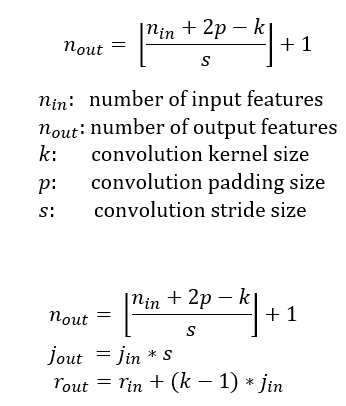



*   Input Block
	* output_size = 26    RF:  2
* CONVOLUTION BLOCK 1
 	* output_size = 24 RF: 5
 	* output_size = 12    RF:  6
* TRANSITION BLOCK 1
  * output_size = 12    RF:  6
* CONVOLUTION BLOCK 
  * output_size = 10    RF:  10
  * output_size = 8    RF: 14
  * output_size = 6    RF: 18
* Global average pooling
  * output_size = 1    RF:  28
* Fully connected
  * output_size = 1    RF: 28
  * output  RF: 28
        


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),
        )        
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),  
            nn.ReLU(),
        ) 
        self.pool1 = nn.MaxPool2d(2, 2)        
        self.trans1 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU()
        )        
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=12, kernel_size=(3, 3), padding=0, bias=False), 
            nn.ReLU(),
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=(3, 3), padding=0, bias=False), 
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=20, kernel_size=(3, 3), padding=0, bias=False), 
            nn.ReLU(),
        )         
        
        self.gap = nn.Sequential(
            nn.AvgPool2d(6)  
        )

       
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=16, kernel_size=(1, 1), padding=0, bias=False), 
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),  
            )

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.pool1(x)
        x = self.trans1(x)
        x = self.convblock3(x)
        x = self.gap(x)
        x = self.convblock5(x)
        x = x.view(-1, 10)   # Converte 2D to 1D
        
        return F.log_softmax(x, dim=-1)

In [33]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           1,152
              ReLU-4           [-1, 16, 24, 24]               0
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6            [-1, 8, 12, 12]             128
              ReLU-7            [-1, 8, 12, 12]               0
            Conv2d-8           [-1, 12, 10, 10]             864
              ReLU-9           [-1, 12, 10, 10]               0
           Conv2d-10             [-1, 16, 8, 8]           1,728
             ReLU-11             [-1, 16, 8, 8]               0
           Conv2d-12             [-1, 20, 6, 6]           2,880
             ReLU-13             [-1, 20, 6, 6]               0
        AvgPool2d-14             [-

In [20]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []


In [21]:
def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
   
    data, target = data.to(device), target.to(device)

    optimizer.zero_grad()
    y_pred = model(data)

    # Calcula a perda
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()    
    pred = y_pred.argmax(dim=1, keepdim=True) 
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Batch_id={batch_idx} Loss={loss.item():.5f} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() 
            pred = output.argmax(dim=1, keepdim=True)  
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

## Execução

In [22]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
NUM_EPOCHS = 15
for epoch in range(1,NUM_EPOCHS+1):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 1


Batch_id=937 Loss=2.30204 Accuracy=9.86: 100%|██████████| 938/938 [00:41<00:00, 22.79it/s]



Test set: Average loss: 2.3024, Accuracy: 958/10000 (9.58%)

EPOCH: 2


Batch_id=937 Loss=1.14968 Accuracy=15.12: 100%|██████████| 938/938 [00:40<00:00, 23.39it/s]



Test set: Average loss: 1.0244, Accuracy: 6526/10000 (65.26%)

EPOCH: 3


Batch_id=937 Loss=0.04412 Accuracy=90.40: 100%|██████████| 938/938 [00:39<00:00, 23.59it/s]



Test set: Average loss: 0.1219, Accuracy: 9632/10000 (96.32%)

EPOCH: 4


Batch_id=937 Loss=0.06429 Accuracy=96.06: 100%|██████████| 938/938 [00:40<00:00, 23.00it/s]



Test set: Average loss: 0.0790, Accuracy: 9767/10000 (97.67%)

EPOCH: 5


Batch_id=937 Loss=0.02071 Accuracy=97.14: 100%|██████████| 938/938 [00:39<00:00, 23.58it/s]



Test set: Average loss: 0.0763, Accuracy: 9768/10000 (97.68%)

EPOCH: 6


Batch_id=937 Loss=0.02585 Accuracy=97.71: 100%|██████████| 938/938 [00:40<00:00, 22.99it/s]



Test set: Average loss: 0.0690, Accuracy: 9783/10000 (97.83%)

EPOCH: 7


Batch_id=937 Loss=0.02186 Accuracy=97.97: 100%|██████████| 938/938 [00:39<00:00, 23.72it/s]



Test set: Average loss: 0.0559, Accuracy: 9820/10000 (98.20%)

EPOCH: 8


Batch_id=937 Loss=0.02479 Accuracy=98.25: 100%|██████████| 938/938 [00:41<00:00, 22.68it/s]



Test set: Average loss: 0.0550, Accuracy: 9830/10000 (98.30%)

EPOCH: 9


Batch_id=937 Loss=0.06839 Accuracy=98.42: 100%|██████████| 938/938 [00:39<00:00, 23.65it/s]



Test set: Average loss: 0.0738, Accuracy: 9767/10000 (97.67%)

EPOCH: 10


Batch_id=937 Loss=0.03581 Accuracy=98.54: 100%|██████████| 938/938 [00:40<00:00, 23.12it/s]



Test set: Average loss: 0.0548, Accuracy: 9825/10000 (98.25%)

EPOCH: 11


Batch_id=937 Loss=0.01509 Accuracy=98.68: 100%|██████████| 938/938 [00:39<00:00, 23.75it/s]



Test set: Average loss: 0.0415, Accuracy: 9879/10000 (98.79%)

EPOCH: 12


Batch_id=937 Loss=0.00425 Accuracy=98.70: 100%|██████████| 938/938 [00:40<00:00, 23.16it/s]



Test set: Average loss: 0.0430, Accuracy: 9865/10000 (98.65%)

EPOCH: 13


Batch_id=937 Loss=0.03061 Accuracy=98.86: 100%|██████████| 938/938 [00:41<00:00, 22.83it/s]



Test set: Average loss: 0.0365, Accuracy: 9892/10000 (98.92%)

EPOCH: 14


Batch_id=937 Loss=0.04339 Accuracy=98.89: 100%|██████████| 938/938 [00:40<00:00, 23.38it/s]



Test set: Average loss: 0.0447, Accuracy: 9854/10000 (98.54%)

EPOCH: 15


Batch_id=937 Loss=0.10634 Accuracy=98.94: 100%|██████████| 938/938 [00:40<00:00, 23.06it/s]



Test set: Average loss: 0.0388, Accuracy: 9879/10000 (98.79%)



In [28]:
from fastai.basics import *
import fastai.basics

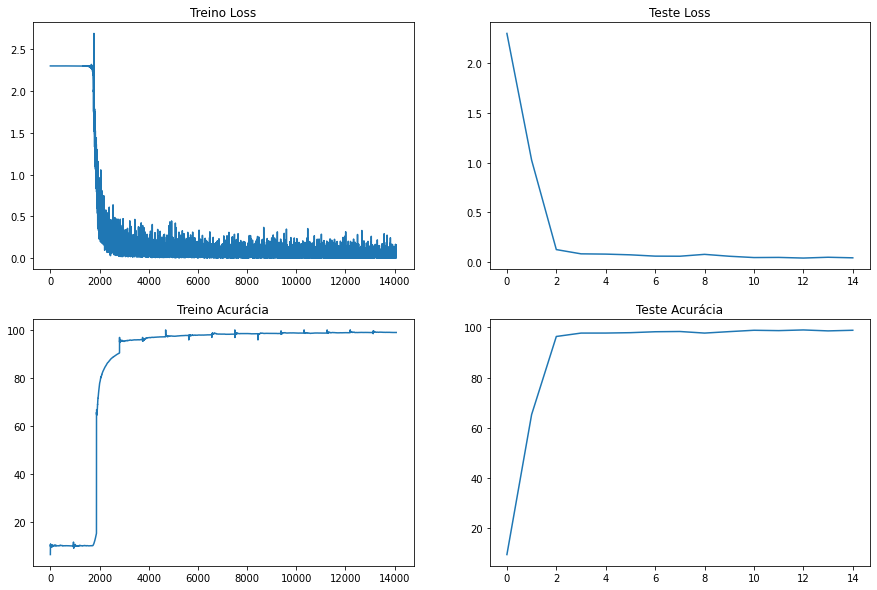

In [36]:
with torch.no_grad():
      fig, axs = plt.subplots(2,2,figsize=(15,10))
      axs[0, 0].plot(train_losses)
      axs[0, 0].set_title("Treino Loss")
      axs[1, 0].plot(train_acc)
      axs[1, 0].set_title("Treino Acurácia")
      axs[0, 1].plot(test_losses)
      axs[0, 1].set_title("Teste Loss")
      axs[1, 1].plot(test_acc)
      axs[1, 1].set_title("Teste Acurácia")